<a href="https://colab.research.google.com/github/augnoel/noel/blob/develop/standardA_clustering_ans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 패키지 호출

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

##1. PCA 실습

In [ ]:
#iris 데이터 불러와서 DataFrame으로 저장
data_iris = datasets.load_iris()
df_iris = pd.DataFrame(data = data_iris["data"], columns = data_iris["feature_names"])
label_iris = data_iris["target"]

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#iris 데이터 정규화 진행
scaler = StandardScaler()
new_cols = [x.split(" (cm)")[0] for x in df_iris.columns]
df_iris_s = pd.DataFrame(data = scaler.fit_transform(df_iris), columns = new_cols)

In [ ]:
df_iris_s.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
#정규화된 데이터 대상으로 PCA 진행
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(n_components = 2)
df_iris_pca = pd.DataFrame(data = pca.fit_transform(df_iris_s), columns = ['pc1', 'pc2'])
df_iris_pca["label"] = label_iris

In [ ]:
df_iris_pca.head()

,pc1,pc2,label
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [ ]:
#PCA 결과가 분산을 얼마나 보존하고 있는지 확인
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
#PC(주성분)에서 기존 변수들의 선형 관계가 어떻게 나타나는지 확인
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [ ]:
print([np.dot(pca.components_[0], df_iris_s.loc[0]), np.dot(pca.components_[1], df_iris_s.loc[0])])
print(df_iris_pca.loc[0].to_list())

[-2.264702808807589, 0.48002659652098634]
[-2.2647028088075967, 0.48002659652098845, 0.0]


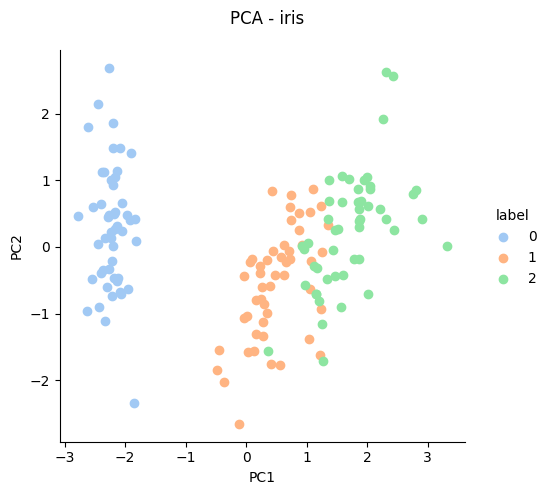

In [ ]:
#PCA 시각화 with Seaborn
g = sns.FacetGrid(df_iris_pca, hue="label", height = 5, margin_titles = True,
                  palette = sns.color_palette("pastel", 3))
g.map_dataframe(plt.scatter, "pc1", "pc2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("PCA - iris")
g.set_xlabels("PC1")
g.set_ylabels("PC2")

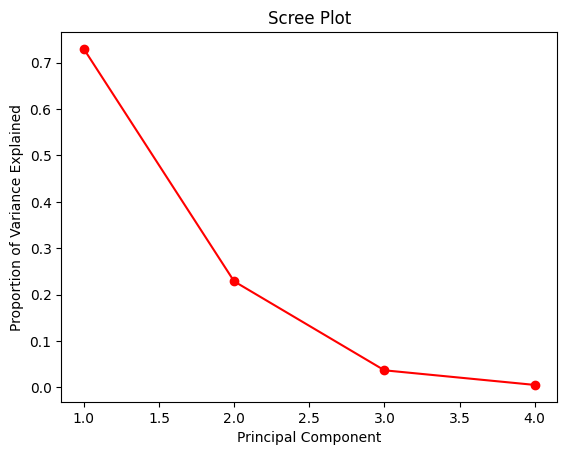

In [ ]:
#Scree Plot 그려보기
n_feature = len(df_iris_s.columns)
pca_scree = PCA(n_components = n_feature)
pca_scree.fit(df_iris_s)

pc_arr = np.arange(pca_scree.n_components_) + 1
plt.plot(pc_arr, pca_scree.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

##2. t-SNE 실습

In [ ]:
#digits 데이터 호출
data_digits = datasets.load_digits()
df_digits = pd.DataFrame(data = data_digits["data"], columns = data_digits["feature_names"])
label_digits = data_digits["target"]

In [ ]:
#digits 데이터가 어떤 값인지 확인해보기
df_digits.shape

(1797, 64)

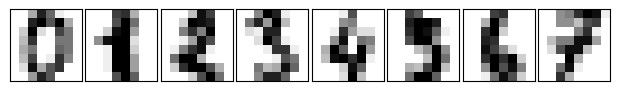

In [ ]:
#digits 데이터 이미지 확인
fig = plt.figure(figsize=(6, 3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(data_digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
#t-sne 학습
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
tsne = TSNE(n_components=2)

df_digits_tsne = pd.DataFrame(data = tsne.fit_transform(df_digits), columns = ['col1', 'col2'])
df_digits_tsne["label"] = label_digits

In [ ]:
df_digits_tsne.head()

,col1,col2,label
0,-2.072648,56.774544,0
1,10.562748,-11.208804,1
2,-13.128332,-18.576653,2
3,-35.379486,6.312646,3
4,40.580650,-7.131368,4


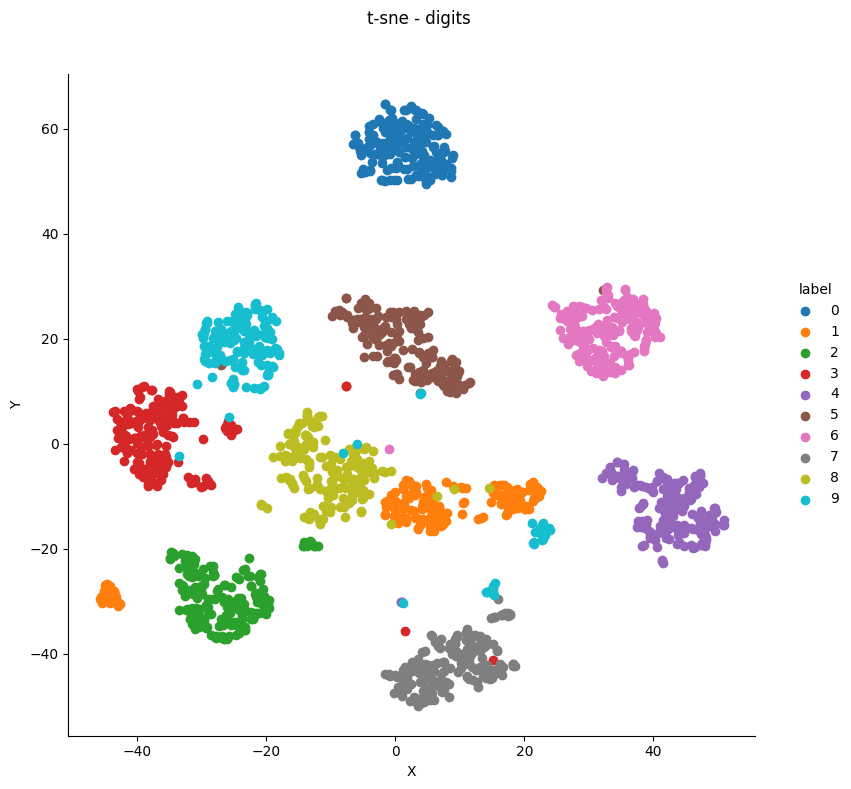

In [ ]:
#t-sne 시각화
g = sns.FacetGrid(df_digits_tsne, hue="label", height = 8, margin_titles = True,
                  palette = sns.color_palette())
g.map_dataframe(plt.scatter, "col1", "col2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("t-sne - digits")
g.set_xlabels("X")
g.set_ylabels("Y")

In [ ]:
#동일 데이터를 PCA 시각화하여 결과 비교
scaler2 = StandardScaler()
df_digits_s = pd.DataFrame(data = scaler2.fit_transform(df_digits), columns = df_digits.columns)
pca2 = PCA(n_components = 2)
df_digits_pca = pd.DataFrame(data = pca2.fit_transform(df_digits_s), columns = ['pc1', 'pc2'])
df_digits_pca["label"] = label_digits

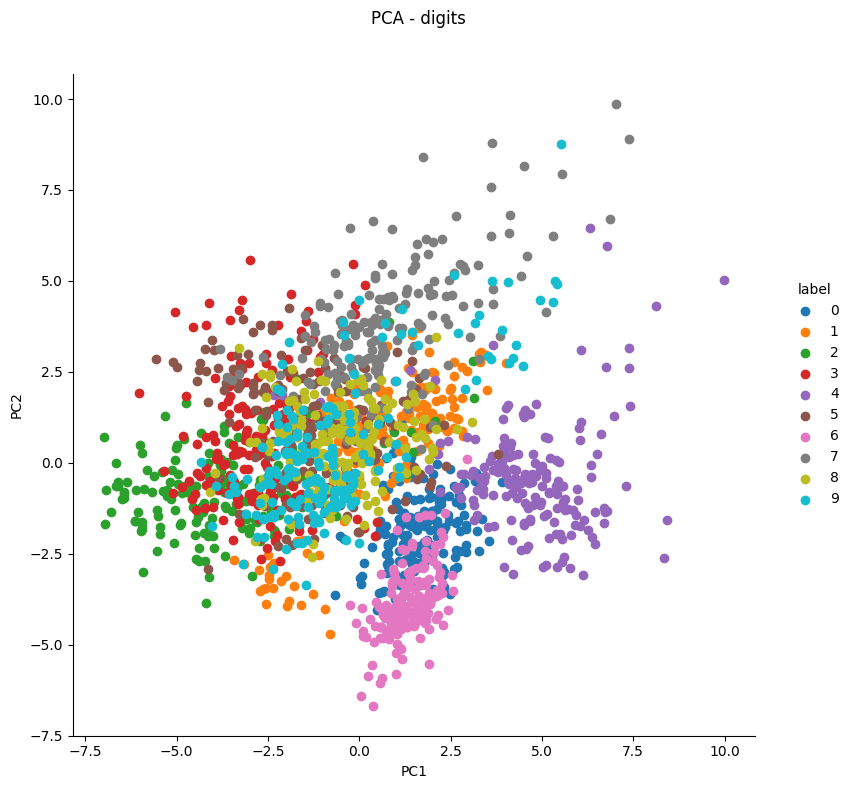

In [ ]:
#PCA 결과 시각화
g = sns.FacetGrid(df_digits_pca, hue="label", height = 8, margin_titles = True,
                  palette = sns.color_palette())
g.map_dataframe(plt.scatter, "pc1", "pc2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("PCA - digits")
g.set_xlabels("PC1")
g.set_ylabels("PC2")

In [ ]:
#PCA가 커버하는 분산 확인
pca2.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [ ]:
## 추가 : 3d plotting

tsne = TSNE(n_components=3, n_iter=500)
df_digits_tsne_3d = pd.DataFrame(data = tsne.fit_transform(df_digits), columns = ['col1', 'col2', 'col3'])
df_digits_tsne_3d["label"] = label_digits

Text(0.5, 0, 'Z')

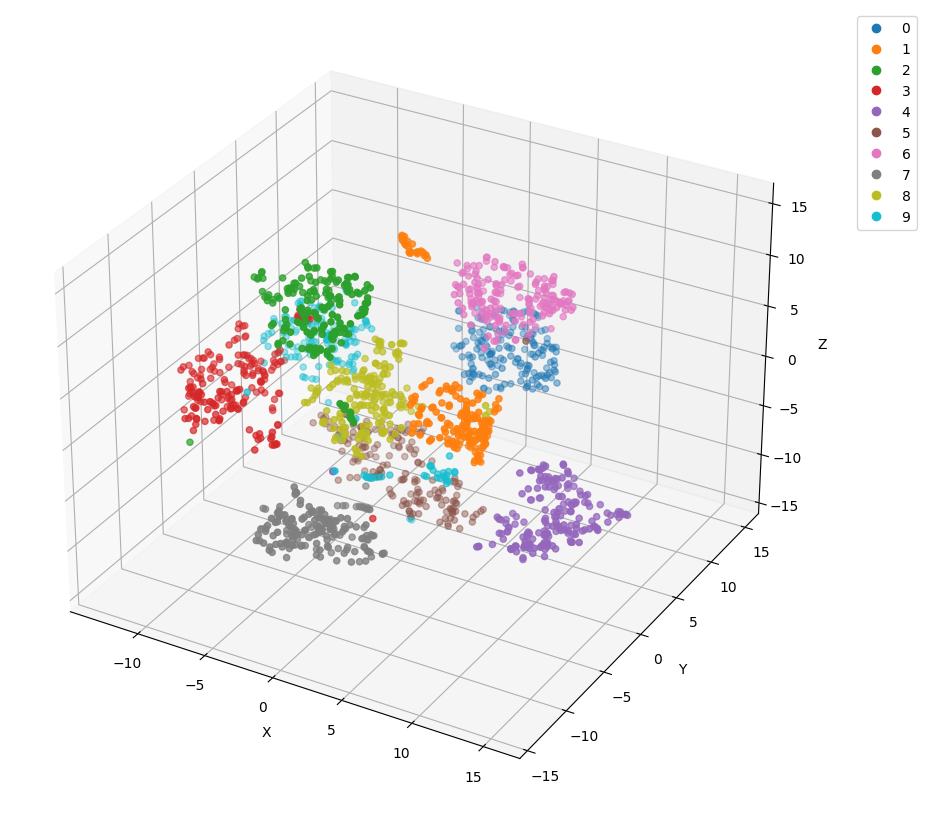

In [ ]:
#t-sne 시각화
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
fig.add_axes(ax)

sc= ax.scatter("col1", "col2", "col3",\
               data = df_digits_tsne_3d,\
               c = df_digits_tsne_3d["label"],\
               cmap = ListedColormap(sns.color_palette()))

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

In [ ]:
sc.legend_elements()

([<matplotlib.lines.Line2D at 0x7b841faf89a0>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{5}$',
  '$\\mathdefault{6}$',
  '$\\mathdefault{7}$',
  '$\\mathdefault{8}$',
  '$\\mathdefault{9}$'])